# Basic classification: Classify images of clothing

https://www.tensorflow.org/tutorials/keras/classification

Goal: Classify clothing from the Fashion MNIST dataset

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.14.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test,y_test) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shity/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

In [4]:
x_train.shape


(60000, 28, 28)

In [5]:
len(y_train)

60000

In [6]:
y_train

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

## Preprocessing

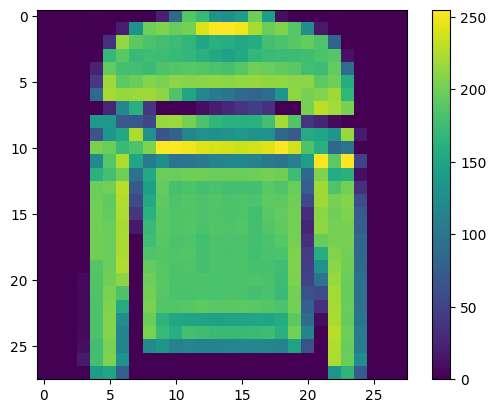

In [7]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
x_train, y_train = x_train/255.0,y_train/255.0

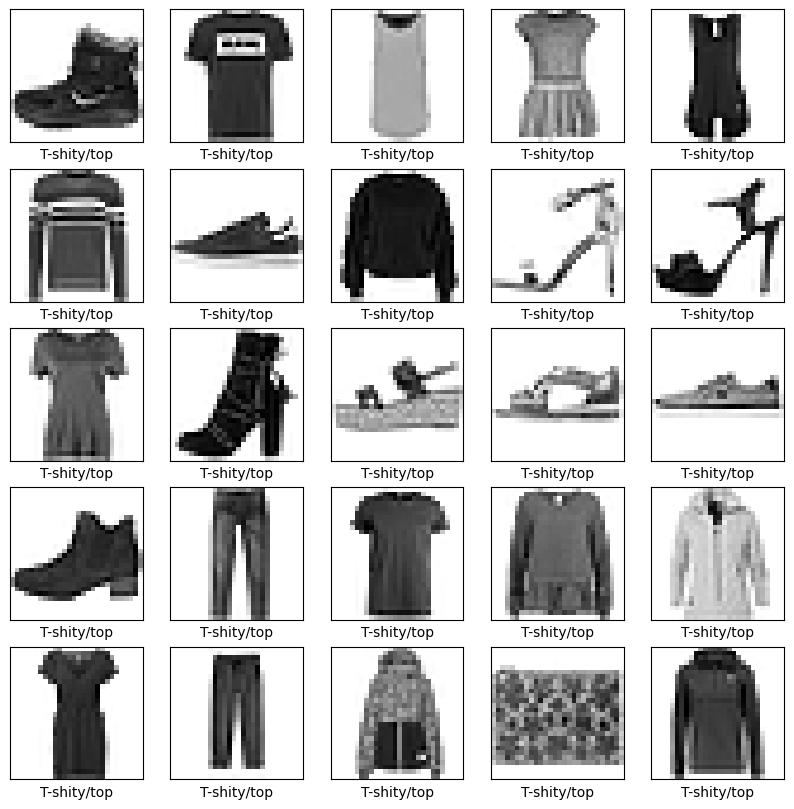

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[int(y_train[i])])
plt.show()

## Build the model

Networks are like ogres they have layers.

This is a model with 3 layers:
Flatten - Dense - Dense

Flatten Layers transforms the imagesinto a one dimenionsal array.
Dense Layers:
    128 - arbritary number but is a power of 2 so it fits easier for computational math.
    10 - is for the nubmer of classes we are predicting for.

In [20]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


## Compiling

Optimizer - Updates based on data from loss function
Loss - This is a function that minimizes deviation and derivation steers the function towards 0
Metric - This is accuracy

In [25]:
optim = tf.keras.optimizers.Adam(learning_rate=0.00001)

model.compile(optimizer=optim,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])



## Train

In [26]:
model.fit(x_train,y_train, epochs=15,validation_data=(x_, testY))

Epoch 1/15
1875/1875 [==============================] - 2s 1ms/step - loss: 7.1526e-11 - accuracy: 0.1000
Epoch 2/15
 896/1875 [=============>................] - ETA: 0s - loss: 2.0788e-11 - accuracy: 0.1000

KeyboardInterrupt: 